In [1]:
import healpy as hp

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import os

In [44]:
beam = 1/hp.gauss_beam(np.radians(.5),lmax=1500)

In [29]:
cmb_path = os.path.join(os.environ['SCRATCH'],'S4BIRD','CMB_Lensed_Maps','CMB_SET1','cmb_sims_0001.fits')

In [30]:
exp_path = os.path.join(os.environ['SCRATCH'],'S4BIRD','LiteBIRD','SIM_SET1_FG','Maps','exp_sims_0001.fits')

In [31]:
cmb_map = hp.ud_grade(hp.read_map(cmb_path,(0,1,2)),512)

In [32]:
cmb_alm = hp.map2alm(cmb_map)

In [60]:
exp_alm = hp.read_alm(exp_path,(1,2,3))

In [61]:
hp.almxfl(exp_alm[0],beam,inplace=True)
hp.almxfl(exp_alm[1],beam,inplace=True)
hp.almxfl(exp_alm[2],beam,inplace=True)

array([0.        +0.j, 0.        +0.j, 0.01389839+0.j, ...,
       0.        +0.j, 0.        +0.j, 0.        +0.j])

In [62]:
exp_map = hp.alm2map(exp_alm,512)

In [63]:
exp_alm_d = hp.map2alm(exp_map)

In [64]:
mask_path = '/project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/LB_Nside2048_fsky_0p8_binary.fits.gz'

In [65]:
mask = hp.ud_grade(hp.read_map(mask_path),512)

In [66]:
noise = exp_map - (cmb_map*mask)

In [67]:
nalm = hp.map2alm(noise)

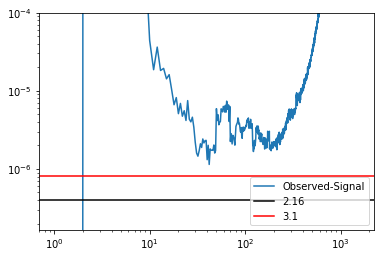

In [76]:
plt.loglog(hp.alm2cl(nalm[1]),label='Observed-Signal')
plt.axhline(np.radians(2.16/60)**2,c='k',label='2.16')
plt.axhline(np.radians(3.12/60)**2,c='r',label='3.1')
plt.ylim(None,10**-4)
plt.legend()

In [73]:
nalm[0]

array([-1.22834241e+01+0.00000000e+00j,  7.83246082e-01+0.00000000e+00j,
       -6.34870651e+00+0.00000000e+00j, ...,
       -1.34867618e-05-3.38933872e-06j, -6.45151123e-05-1.50622345e-05j,
       -9.77200575e-06+1.10530282e-05j])